<a href="https://colab.research.google.com/github/Harshtrivedi456/IDS/blob/main/MLfinalbinary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d aymeneinformatique/cic-diad2024


Dataset URL: https://www.kaggle.com/datasets/aymeneinformatique/cic-diad2024
License(s): unknown
 99% 1.37G/1.39G [00:20<00:00, 63.3MB/s]
100% 1.39G/1.39G [00:20<00:00, 71.1MB/s]


In [ ]:
import zipfile

zip_path = "cic-diad2024.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("cic_diad_2024")


In [ ]:
import os

for root, dirs, files in os.walk("/content/cic_diad_2024"):
    for f in files:
        if f.endswith(".csv"):
            print(os.path.join(root, f))


/content/cic_diad_2024/IoT device identification and anomaly detection dataset (CIC IoT-DIAD 2024)/DOS/DOS HTTP FLOOD/DoS-HTTP_Flood.pcap_Flow.csv
/content/cic_diad_2024/IoT device identification and anomaly detection dataset (CIC IoT-DIAD 2024)/DOS/DOS HTTP FLOOD/DoS-HTTP_Flood1.pcap_Flow.csv
/content/cic_diad_2024/IoT device identification and anomaly detection dataset (CIC IoT-DIAD 2024)/DOS/DOS TCP FLOOD/DoS-TCP_Flood10.pcap_Flow.csv
/content/cic_diad_2024/IoT device identification and anomaly detection dataset (CIC IoT-DIAD 2024)/DOS/DOS TCP FLOOD/DoS-TCP_Flood2.pcap_Flow.csv
/content/cic_diad_2024/IoT device identification and anomaly detection dataset (CIC IoT-DIAD 2024)/DOS/DOS TCP FLOOD/DoS-TCP_Flood1.pcap_Flow.csv
/content/cic_diad_2024/IoT device identification and anomaly detection dataset (CIC IoT-DIAD 2024)/DOS/DOS TCP FLOOD/DoS-TCP_Flood3.pcap_Flow.csv
/content/cic_diad_2024/IoT device identification and anomaly detection dataset (CIC IoT-DIAD 2024)/DOS/DOS TCP FLOOD/DoS

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


In [ ]:
def clean_chunk(df):
    df = df.replace([np.inf, -np.inf], np.nan)

    df = df.applymap(
        lambda x: np.nan if isinstance(x, (int, float)) and (abs(x) > 1e10) else x
    )

    df = df.fillna(df.median(numeric_only=True))

    return df


In [ ]:
files_dict = {

    "VulnerabilityScan": "/content/cic_diad_2024/IoT/Recon/VulnerabilityScan.pcap_Flow.csv",

    "ACK_Fragmentation": "/content/cic_diad_2024/IoT/DDOS/DDOS ACK Fragmentation/DDoS-ACK_Fragmentation4.pcap_Flow.csv",
    "ICMP_Fragmentation": "/content/cic_diad_2024/IoT/DDOS/DDOS ICMP Fragmentation/DDoS-ICMP_Fragmentation5.pcap_Flow.csv",
    "ICMP_Flood": "/content/cic_diad_2024/IoT/DDOS/DDOS ICMP FLOOD/DDoS-ICMP_Flood23.pcap_Flow.csv",
    "HTTP_Flood_DDoS": "/content/cic_diad_2024/IoT/DDOS/DDOS HTTP FLOOD/DDoS-HTTP_Flood-.pcap_Flow.csv",

    "DoS_HTTP_Flood": "/content/cic_diad_2024/IoT/DOS/DOS HTTP FLOOD/DoS-HTTP_Flood1.pcap_Flow.csv",
    "DoS_TCP_Flood": "/content/cic_diad_2024/IoT/DOS/DOS TCP FLOOD/DoS-TCP_Flood1.pcap_Flow.csv",
    "DoS_UDP_Flood": "/content/cic_diad_2024/IoT/DOS/DOS UDP FLOOD/DoS-UDP_Flood6.pcap_Flow.csv",
    "DoS_SYN_Flood": "/content/cic_diad_2024/IoT/DOS/DOS SYN FLOOD/DoS-SYN_Flood6.pcap_Flow.csv",

    "DNS_Spoofing": "/content/cic_diad_2024/IoT/Spoofing/DNS Spoofing/DNS_Spoofing.pcap_Flow.csv",
    "ARP_Spoofing": "/content/cic_diad_2024/IoT/Spoofing/ARP Spoofing/MITM-ArpSpoofing.pcap_Flow.csv",

    "Mirai": "/content/cic_diad_2024/IoT/Mirai/Mirai-greeth_flood7.pcap_Flow.csv",

    "SQLInjection": "/content/cic_diad_2024/IoT/Web-Based/Sqlinjection/SqlInjection.pcap_Flow.csv",
    "XSS": "/content/cic_diad_2024/IoT/Web-Based/XSS/XSS.pcap_Flow.csv",
    "Uploading_Attack": "/content/cic_diad_2024/IoT/Web-Based/Uploading Attack/Uploading_Attack.pcap_Flow.csv",

    "BruteForce": "/content/cic_diad_2024/IoT/Brute Force/DictionaryBruteForce.pcap_Flow.csv",

    "ICMP_Flood2": "/content/cic_diad_2024/IoT/DDOS/DDOS ICMP FLOOD/DDoS-ICMP_Flood18.pcap_Flow.csv",
    "TCP_Flood2": "/content/cic_diad_2024/IoT/DOS/DOS TCP FLOOD/DoS-TCP_Flood3.pcap_Flow.csv",
    "UDP_Flood2": "/content/cic_diad_2024/IoT/DOS/DOS UDP FLOOD/DoS-UDP_Flood13.pcap_Flow.csv",

    "Benign": "/content/cic_diad_2024/IoT/Benign/BenignTraffic.pcap_Flow.csv"
}


In [ ]:
sample_dfs = []

for label, path in files_dict.items():
    print("Processing:", label)

    chunk_iter = pd.read_csv(path, chunksize=40000)  # RAM safe
    samples = []

    for chunk in chunk_iter:
        chunk = clean_chunk(chunk)

        n = min(1200, len(chunk))
        samples.append(chunk.sample(n=n, random_state=42))

    df_final = pd.concat(samples, ignore_index=True)
    df_final["label"] = label
    sample_dfs.append(df_final)


Processing: VulnerabilityScan
Processing: ACK_Fragmentation
Processing: ICMP_Fragmentation
Processing: ICMP_Flood
Processing: HTTP_Flood_DDoS
Processing: DoS_HTTP_Flood
Processing: DoS_TCP_Flood
Processing: DoS_UDP_Flood
Processing: DoS_SYN_Flood
Processing: DNS_Spoofing
Processing: ARP_Spoofing
Processing: Mirai
Processing: SQLInjection
Processing: XSS
Processing: Uploading_Attack
Processing: BruteForce
Processing: ICMP_Flood2
Processing: TCP_Flood2
Processing: UDP_Flood2
Processing: Benign


In [ ]:
data = pd.concat(sample_dfs, ignore_index=True)
print("Final Combined Shape:", data.shape)


Final Combined Shape: (151200, 213)


In [ ]:
X = data.drop("label", axis=1).select_dtypes(include=np.number)
y = data["label"]

le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
pca = PCA(n_components=0.95)  # keep 95% variance
pca.fit(X)

pca_components = pca.components_
pca_importance = pd.Series(np.abs(pca_components).mean(axis=0), index=X.columns)

pca_selected = pca_importance.sort_values(ascending=False).head(40)
print(pca_selected)


Bwd IAT Total                 0.307665
Fwd IAT Total                 0.249086
Flow Duration                 0.241736
Fwd IAT Min                   0.228325
Flow IAT Min                  0.226649
Idle Max                      0.207207
Fwd IAT Max                   0.206987
Flow IAT Max                  0.206212
Idle Min                      0.161291
Flow IAT Mean                 0.159708
Fwd IAT Mean                  0.152520
Fwd IAT Std                   0.144017
Flow IAT Std                  0.139225
Idle Mean                     0.128151
Bwd IAT Max                   0.125584
Active Max                    0.098296
Idle Std                      0.094372
Bwd IAT Mean                  0.085074
Bwd IAT Min                   0.063433
Active Mean                   0.057925
Active Std                    0.035156
Bwd IAT Std                   0.028187
Active Min                    0.027474
Flow Bytes/s                  0.000510
Packet Length Variance        0.000316
Bwd Bulk Rate Avg        

In [ ]:
sample_dfs = []

for label, path in files_dict.items():
    print("Processing:", label)

    chunk_iter = pd.read_csv(path, chunksize=40000)
    samples = []

    for chunk in chunk_iter:
        chunk = clean_chunk(chunk)

        n = min(1200, len(chunk))
        samples.append(chunk.sample(n=n, random_state=42))

    df_temp = pd.concat(samples, ignore_index=True)
    df_temp["label"] = label
    sample_dfs.append(df_temp)

# 🔥 IMPORTANT: combine all classes
df_final = pd.concat(sample_dfs, ignore_index=True)

print(df_final['label'].value_counts())


Processing: VulnerabilityScan
Processing: ACK_Fragmentation
Processing: ICMP_Fragmentation
Processing: ICMP_Flood
Processing: HTTP_Flood_DDoS
Processing: DoS_HTTP_Flood
Processing: DoS_TCP_Flood
Processing: DoS_UDP_Flood
Processing: DoS_SYN_Flood
Processing: DNS_Spoofing
Processing: ARP_Spoofing
Processing: Mirai
Processing: SQLInjection
Processing: XSS
Processing: Uploading_Attack
Processing: BruteForce
Processing: ICMP_Flood2
Processing: TCP_Flood2
Processing: UDP_Flood2
Processing: Benign
label
DoS_SYN_Flood         45600
DoS_UDP_Flood         26400
DoS_HTTP_Flood        21600
HTTP_Flood_DDoS       15600
VulnerabilityScan     14400
Benign                 6000
ACK_Fragmentation      4800
DNS_Spoofing           2400
UDP_Flood2             2400
ARP_Spoofing           2400
ICMP_Flood             1200
ICMP_Fragmentation     1200
Mirai                  1200
SQLInjection           1200
Uploading_Attack       1200
XSS                    1200
ICMP_Flood2            1200
BruteForce           


📌 MODEL: Logistic Regression


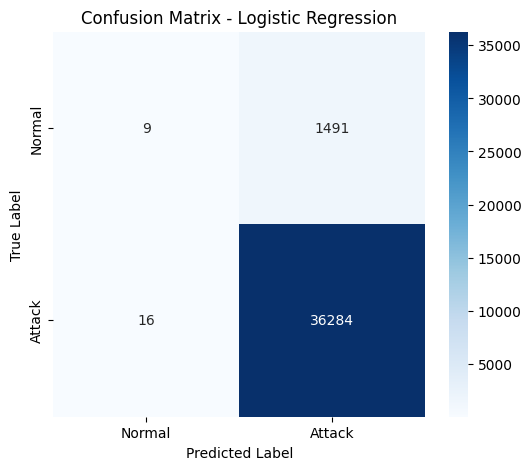


📌 MODEL: Decision Tree


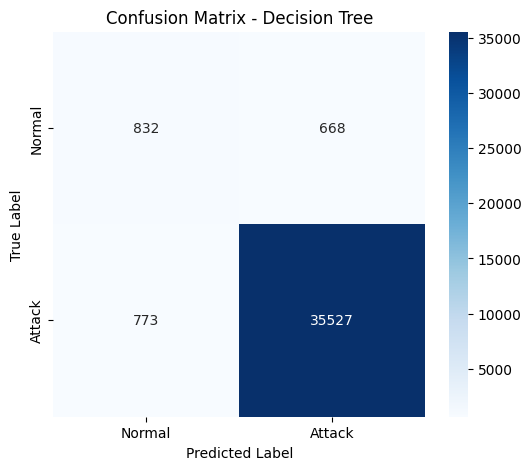


📌 MODEL: Random Forest


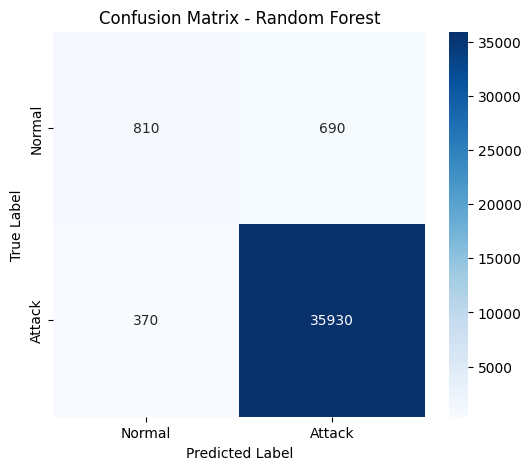


📌 MODEL: Gradient Boosting


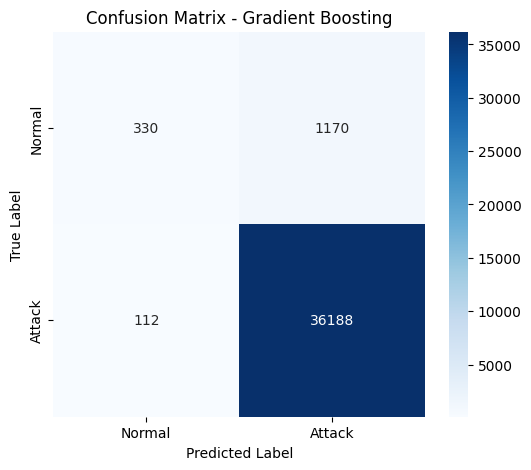


📌 MODEL: XGBoost


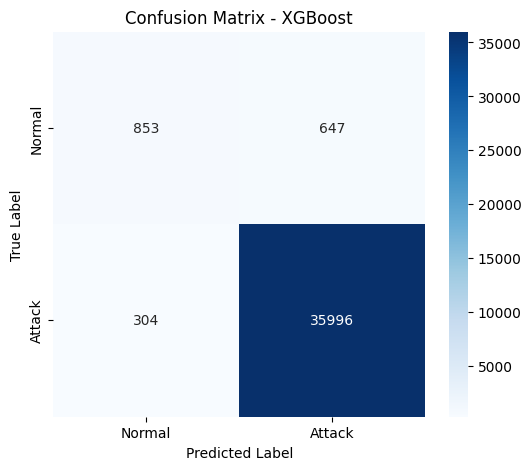


📌 MODEL: KNN


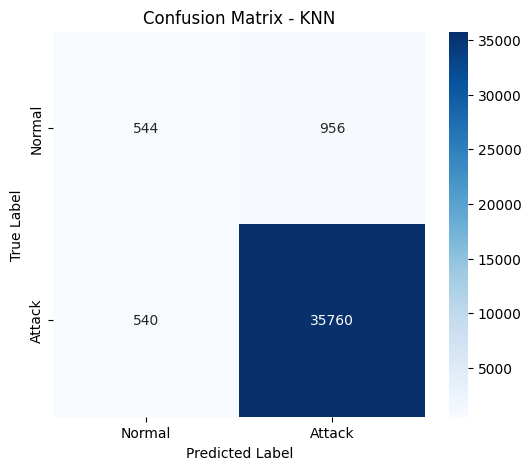

In [ ]:
# ================================================
# 1. IMPORT LIBRARIES
# ================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt
# ================================================
# 2. SELECT PCA FEATURES (already computed)
# ================================================
selected_features = list(pca_selected.index)   # SAME
X = df_final[selected_features]

# -------- BINARY LABEL CONVERSION --------
# Normal = 0, Attack = 1
y = df_final["label"].apply(
    lambda x: 0 if str(x).lower() == "benign" else 1
).values
# ================================================
# 3. TRAIN-TEST SPLIT
# ================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)
# ================================================
# 4. SCALING (for KNN + LR)
# ================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# ================================================
# 5. DEFINE MODELS (BINARY)
# ================================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        n_estimators=200,
        random_state=42,
        use_label_encoder=False
    ),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    # "CatBoost": CatBoostClassifier(verbose=0, iterations=200, random_state=42)
}
# ================================================
# 6. MODEL EVALUATION FUNCTION (CONFUSION MATRIX ONLY)
# ================================================
def evaluate_model(name, model, X_train, X_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\n====================================================")
    print(f"📌 MODEL: {name}")
    print("====================================================")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=["Normal", "Attack"],
        yticklabels=["Normal", "Attack"]
    )
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return None
# ================================================
# 7. TRAIN MODELS (NO ROC, NO MULTICLASS)
# ================================================
for name, model in models.items():

    if name in ["KNN", "Logistic Regression"]:
        evaluate_model(name, model, X_train_scaled, X_test_scaled)
    else:
        evaluate_model(name, model, X_train, X_test)



📌 MODEL: Logistic Regression
✔ Accuracy : 0.9601
✔ Precision: 0.9605
✔ Recall   : 0.9996  (Detection Rate)
✔ F1 Score : 0.9797
✔ FPR      : 0.9940
✔ FNR      : 0.0004
✔ ROC-AUC  : 0.8693


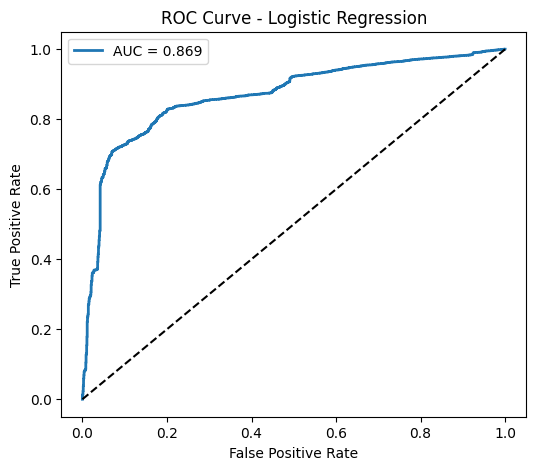

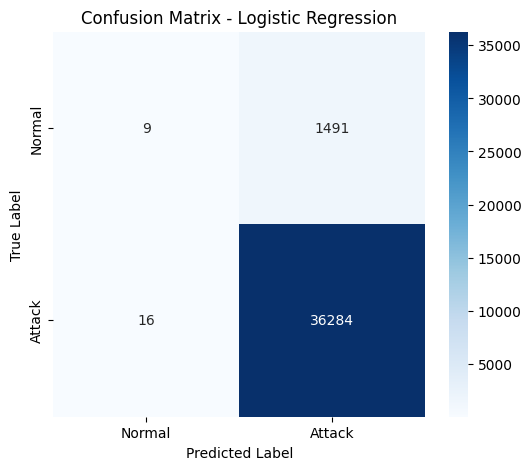


📌 MODEL: Decision Tree
✔ Accuracy : 0.9619
✔ Precision: 0.9815
✔ Recall   : 0.9787  (Detection Rate)
✔ F1 Score : 0.9801
✔ FPR      : 0.4453
✔ FNR      : 0.0213
✔ ROC-AUC  : 0.7667


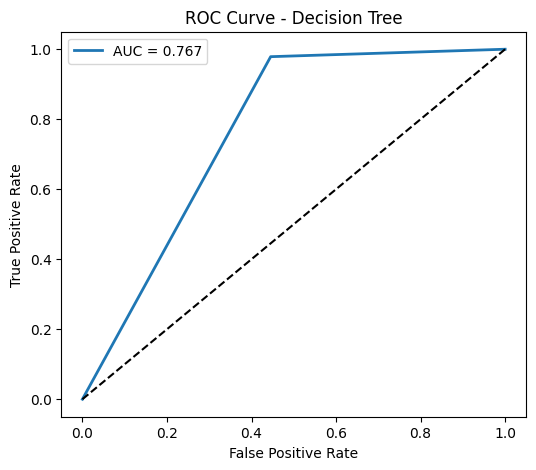

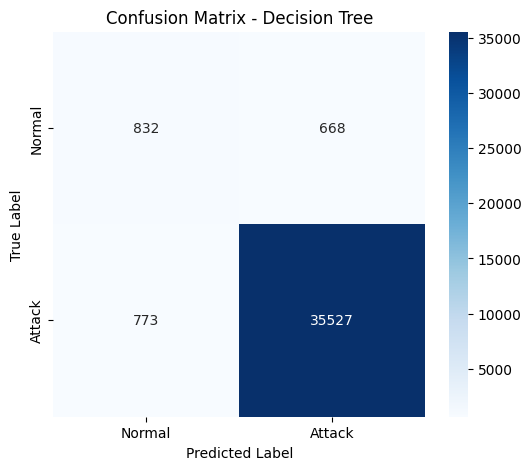


📌 MODEL: Random Forest
✔ Accuracy : 0.9720
✔ Precision: 0.9812
✔ Recall   : 0.9898  (Detection Rate)
✔ F1 Score : 0.9855
✔ FPR      : 0.4600
✔ FNR      : 0.0102
✔ ROC-AUC  : 0.9717


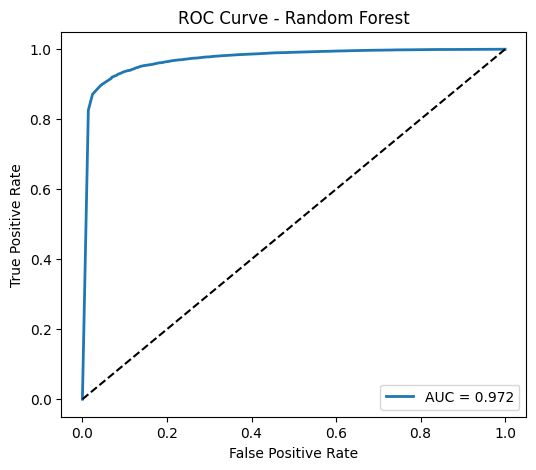

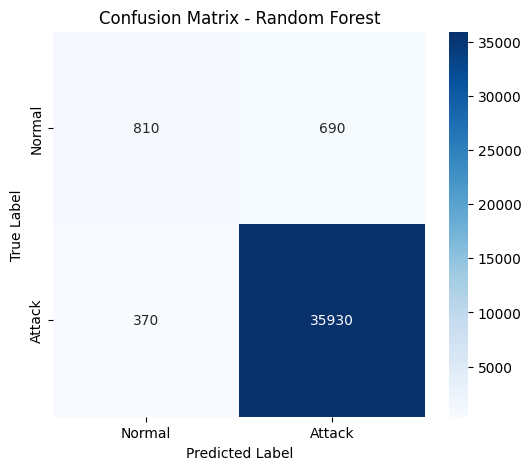


📌 MODEL: Gradient Boosting
✔ Accuracy : 0.9661
✔ Precision: 0.9687
✔ Recall   : 0.9969  (Detection Rate)
✔ F1 Score : 0.9826
✔ FPR      : 0.7800
✔ FNR      : 0.0031
✔ ROC-AUC  : 0.9671


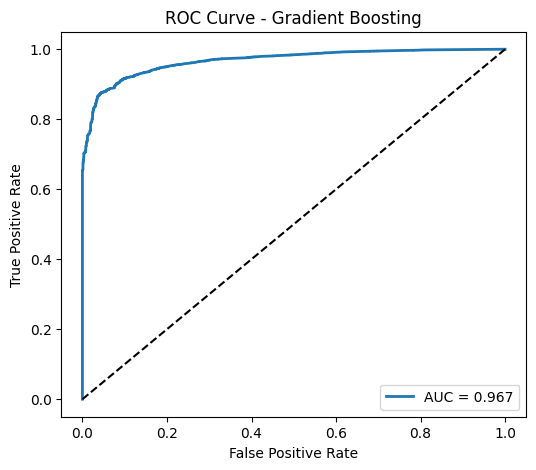

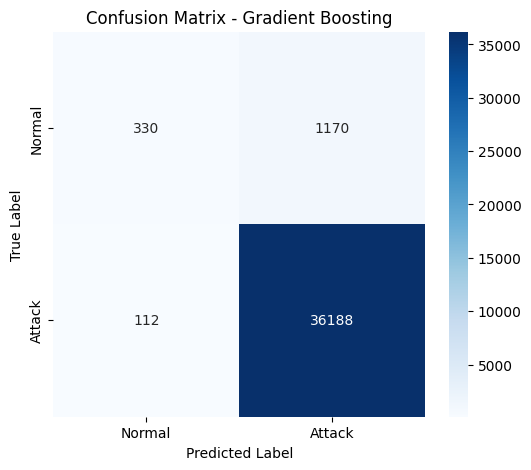


📌 MODEL: XGBoost
✔ Accuracy : 0.9748
✔ Precision: 0.9823
✔ Recall   : 0.9916  (Detection Rate)
✔ F1 Score : 0.9870
✔ FPR      : 0.4313
✔ FNR      : 0.0084
✔ ROC-AUC  : 0.9838


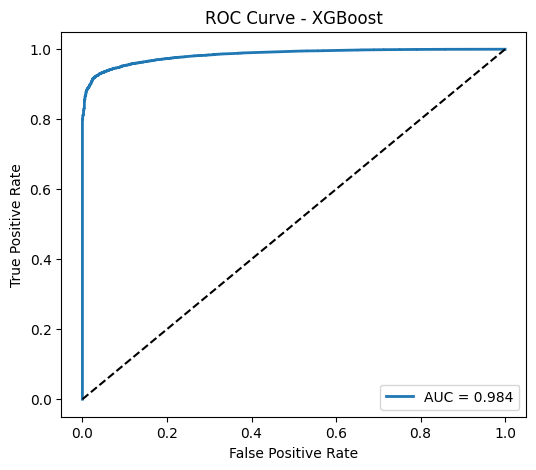

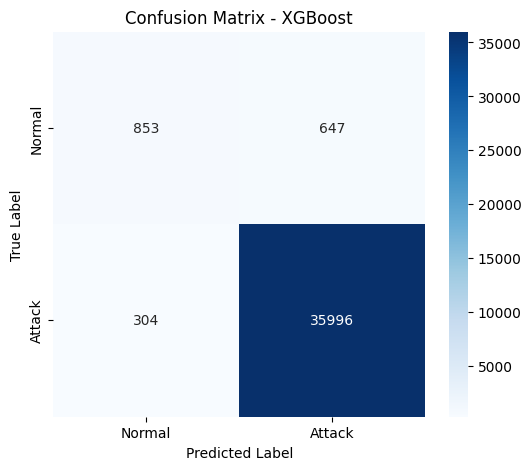


📌 MODEL: KNN
✔ Accuracy : 0.9604
✔ Precision: 0.9740
✔ Recall   : 0.9851  (Detection Rate)
✔ F1 Score : 0.9795
✔ FPR      : 0.6373
✔ FNR      : 0.0149
✔ ROC-AUC  : 0.8983


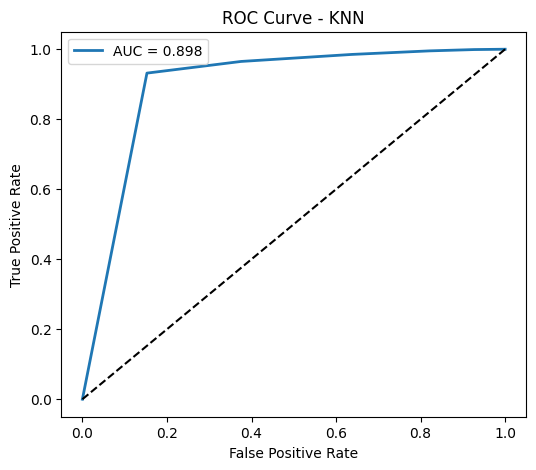

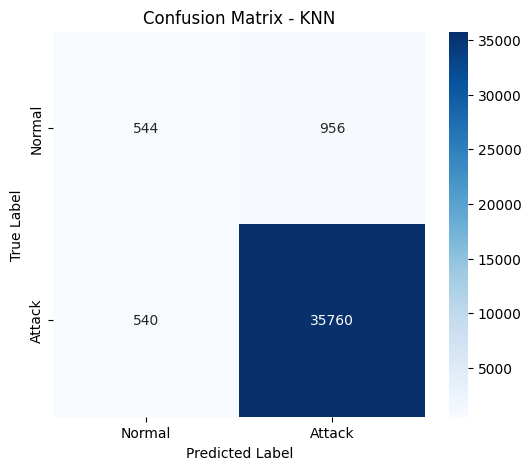

In [ ]:
# ================================================
# 1. IMPORT LIBRARIES
# ================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt
# ================================================
# 2. SELECT PCA FEATURES (already computed)
# ================================================
selected_features = list(pca_selected.index)   # SAME
X = df_final[selected_features]

# -------- BINARY LABEL CONVERSION --------
# Normal = 0, Attack = 1
y = df_final["label"].apply(
    lambda x: 0 if str(x).lower() == "benign" else 1
).values
# ================================================
# 3. TRAIN-TEST SPLIT
# ================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)
# ================================================
# 4. SCALING (for KNN + LR)
# ================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# ================================================
# 5. DEFINE MODELS (BINARY)
# ================================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        n_estimators=200,
        random_state=42,
        use_label_encoder=False
    ),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    # "CatBoost": CatBoostClassifier(verbose=0, iterations=200, random_state=42)
}
# ================================================
# 6. MODEL EVALUATION FUNCTION (BINARY + METRICS)
# ================================================
def evaluate_model(name, model, X_train, X_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Probabilities for ROC-AUC
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)   # Detection Rate
    f1 = f1_score(y_test, y_pred, zero_division=0)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    print("\n====================================================")
    print(f"📌 MODEL: {name}")
    print("====================================================")
    print(f"✔ Accuracy : {acc:.4f}")
    print(f"✔ Precision: {prec:.4f}")
    print(f"✔ Recall   : {rec:.4f}  (Detection Rate)")
    print(f"✔ F1 Score : {f1:.4f}")
    print(f"✔ FPR      : {fpr:.4f}")
    print(f"✔ FNR      : {fnr:.4f}")

    if y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"✔ ROC-AUC  : {roc_auc:.4f}")

        fpr_curve, tpr_curve, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6,5))
        plt.plot(fpr_curve, tpr_curve, linewidth=2, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend()
        plt.show()

    # Confusion Matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=["Normal", "Attack"],
        yticklabels=["Normal", "Attack"]
    )
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return y_prob
# ================================================
# 7. TRAIN MODELS (SAME LOOP)
# ================================================
for name, model in models.items():

    if name in ["KNN", "Logistic Regression"]:
        evaluate_model(name, model, X_train_scaled, X_test_scaled)
    else:
        evaluate_model(name, model, X_train, X_test)





📌 MODEL: Logistic Regression
✔ Accuracy : 0.9509
✔ Precision: 0.9634
✔ Recall   : 0.9864
✔ F1 Score : 0.9747
✔ FPR      : 0.9080  ⭐ IMPORTANT
✔ FNR      : 0.0136
✔ ROC-AUC  : 0.8726


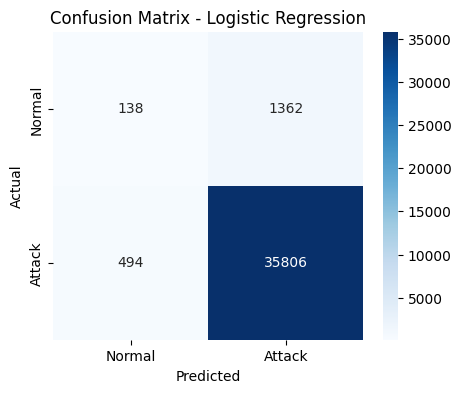


📌 MODEL: Decision Tree
✔ Accuracy : 0.9553
✔ Precision: 0.9908
✔ Recall   : 0.9624
✔ F1 Score : 0.9764
✔ FPR      : 0.2160  ⭐ IMPORTANT
✔ FNR      : 0.0376
✔ ROC-AUC  : 0.8956


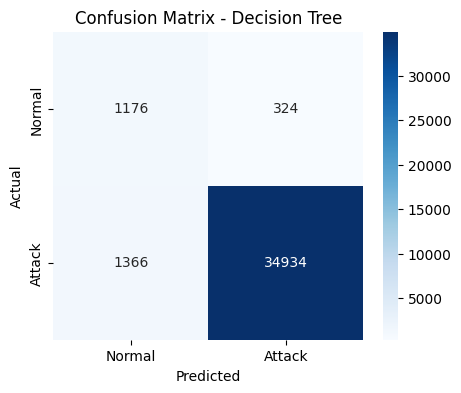


📌 MODEL: Random Forest
✔ Accuracy : 0.9629
✔ Precision: 0.9917
✔ Recall   : 0.9694
✔ F1 Score : 0.9805
✔ FPR      : 0.1960  ⭐ IMPORTANT
✔ FNR      : 0.0306
✔ ROC-AUC  : 0.9808


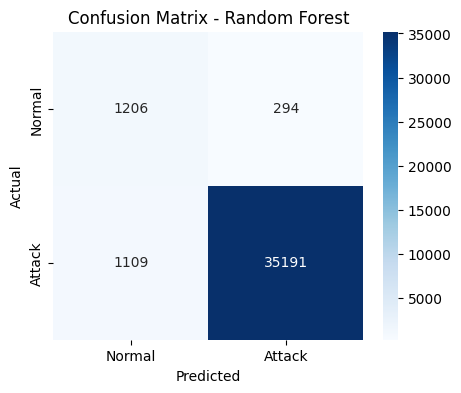


📌 MODEL: Gradient Boosting
✔ Accuracy : 0.9670
✔ Precision: 0.9862
✔ Recall   : 0.9793
✔ F1 Score : 0.9828
✔ FPR      : 0.3313  ⭐ IMPORTANT
✔ FNR      : 0.0207
✔ ROC-AUC  : 0.9769


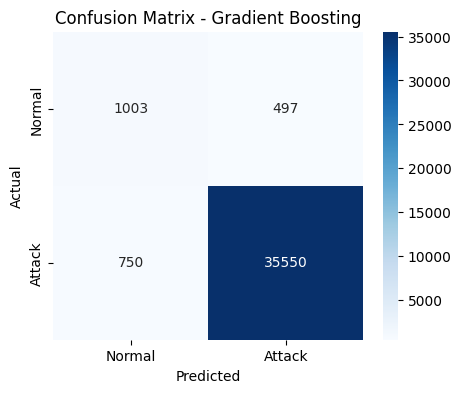


📌 MODEL: XGBoost
✔ Accuracy : 0.8946
✔ Precision: 0.9994
✔ Recall   : 0.8908
✔ F1 Score : 0.9419
✔ FPR      : 0.0140  ⭐ IMPORTANT
✔ FNR      : 0.1092
✔ ROC-AUC  : 0.9800


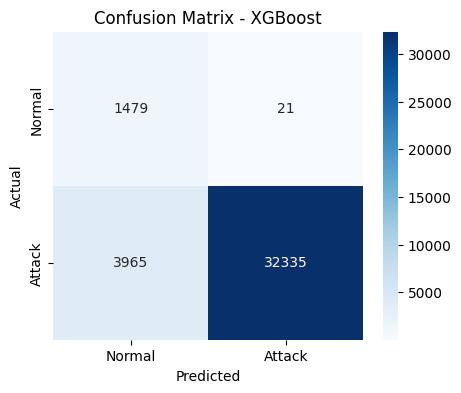


📌 MODEL: KNN
✔ Accuracy : 0.9548
✔ Precision: 0.9843
✔ Recall   : 0.9684
✔ F1 Score : 0.9763
✔ FPR      : 0.3733  ⭐ IMPORTANT
✔ FNR      : 0.0316
✔ ROC-AUC  : 0.9246


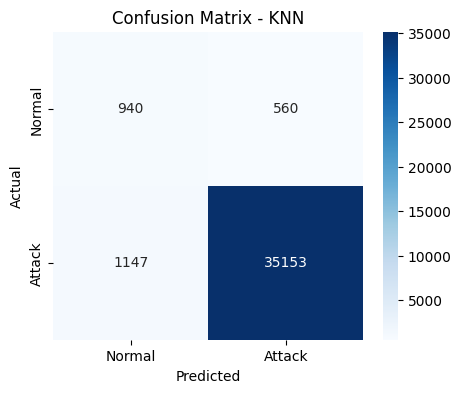


📌 MODEL: Calibrated Random Forest
✔ Accuracy : 0.9648
✔ Precision: 0.9902
✔ Recall   : 0.9729
✔ F1 Score : 0.9815
✔ FPR      : 0.2320  ⭐ IMPORTANT
✔ FNR      : 0.0271
✔ ROC-AUC  : 0.9806


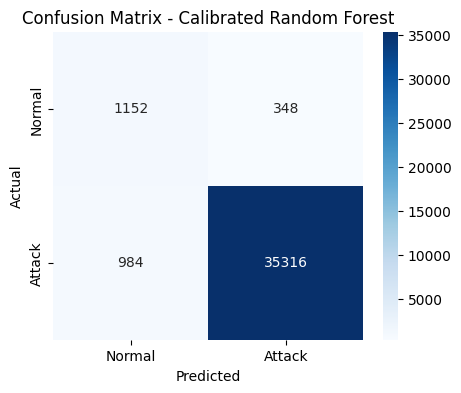


Threshold vs False Positive Rate
Threshold 0.5 → FPR: 0.4253
Threshold 0.6 → FPR: 0.3013
Threshold 0.7 → FPR: 0.1960
Threshold 0.8 → FPR: 0.1153


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.calibration import CalibratedClassifierCV

import seaborn as sns
import matplotlib.pyplot as plt
selected_features = list(pca_selected.index)
X = df_final[selected_features]

# Binary labels
# Normal = 0, Attack = 1
y = df_final["label"].apply(
    lambda x: 0 if str(x).lower() == "benign" else 1
).values
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
DEFAULT_THRESHOLD = 0.7  # IDS-safe threshold

def evaluate_model_fp_aware(name, model, X_train, X_test, threshold=DEFAULT_THRESHOLD):

    model.fit(X_train, y_train)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob >= threshold).astype(int)
    else:
        y_pred = model.predict(X_test)
        y_prob = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    print("\n====================================================")
    print(f"📌 MODEL: {name}")
    print("====================================================")
    print(f"✔ Accuracy : {acc:.4f}")
    print(f"✔ Precision: {prec:.4f}")
    print(f"✔ Recall   : {rec:.4f}")
    print(f"✔ F1 Score : {f1:.4f}")
    print(f"✔ FPR      : {fpr:.4f}  ⭐ IMPORTANT")
    print(f"✔ FNR      : {fnr:.4f}")

    if y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"✔ ROC-AUC  : {roc_auc:.4f}")

    # Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=["Normal", "Attack"],
        yticklabels=["Normal", "Attack"]
    )
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return fpr, fnr
models_fp_aware = {

    "Logistic Regression": LogisticRegression(
        max_iter=3000,
        class_weight={0: 2, 1: 1}
    ),

    "Decision Tree": DecisionTreeClassifier(
        max_depth=15,
        min_samples_split=10,
        class_weight={0: 2, 1: 1},
        random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=18,
        min_samples_split=10,
        class_weight={0: 2, 1: 1},
        random_state=42,
        n_jobs=-1
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5
    ),

    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=(np.sum(y_train == 0) / np.sum(y_train == 1)),
        random_state=42
    ),

    "KNN": KNeighborsClassifier(
        n_neighbors=7,
        weights="distance"
    )
}
for name, model in models_fp_aware.items():

    if name in ["Logistic Regression", "KNN"]:
        evaluate_model_fp_aware(
            name, model,
            X_train_scaled, X_test_scaled
        )
    else:
        evaluate_model_fp_aware(
            name, model,
            X_train, X_test
        )
calibrated_rf = CalibratedClassifierCV(
    estimator=models_fp_aware["Random Forest"],
    method="isotonic",
    cv=3
)

evaluate_model_fp_aware(
    "Calibrated Random Forest",
    calibrated_rf,
    X_train,
    X_test,
    threshold=0.75
)

rf_model = models_fp_aware["Random Forest"]
rf_model.fit(X_train, y_train)

y_prob = rf_model.predict_proba(X_test)[:, 1]

print("\nThreshold vs False Positive Rate")
for t in [0.5, 0.6, 0.7, 0.8]:
    y_pred_t = (y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    fpr = fp / (fp + tn)
    print(f"Threshold {t:.1f} → FPR: {fpr:.4f}")



📌 MODEL: Logistic Regression
✔ Accuracy : 0.7471957671957672
✔ Precision: 0.7256502181594642
✔ Recall   : 0.7471957671957672
✔ F1 Score : 0.7155326835183022
✔ ROC-AUC  : 0.9148152998903455


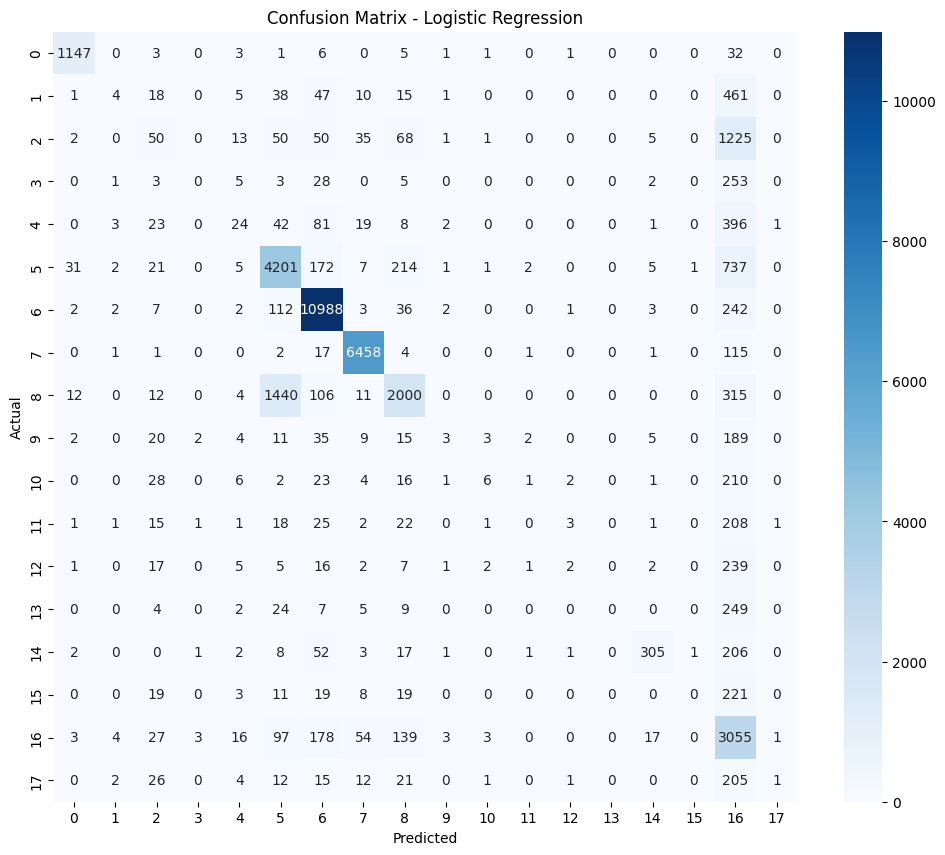


📌 MODEL: Decision Tree
✔ Accuracy : 0.8797883597883598
✔ Precision: 0.8809807368451297
✔ Recall   : 0.8797883597883598
✔ F1 Score : 0.8803398145412122
✔ ROC-AUC  : 0.8085860880187838


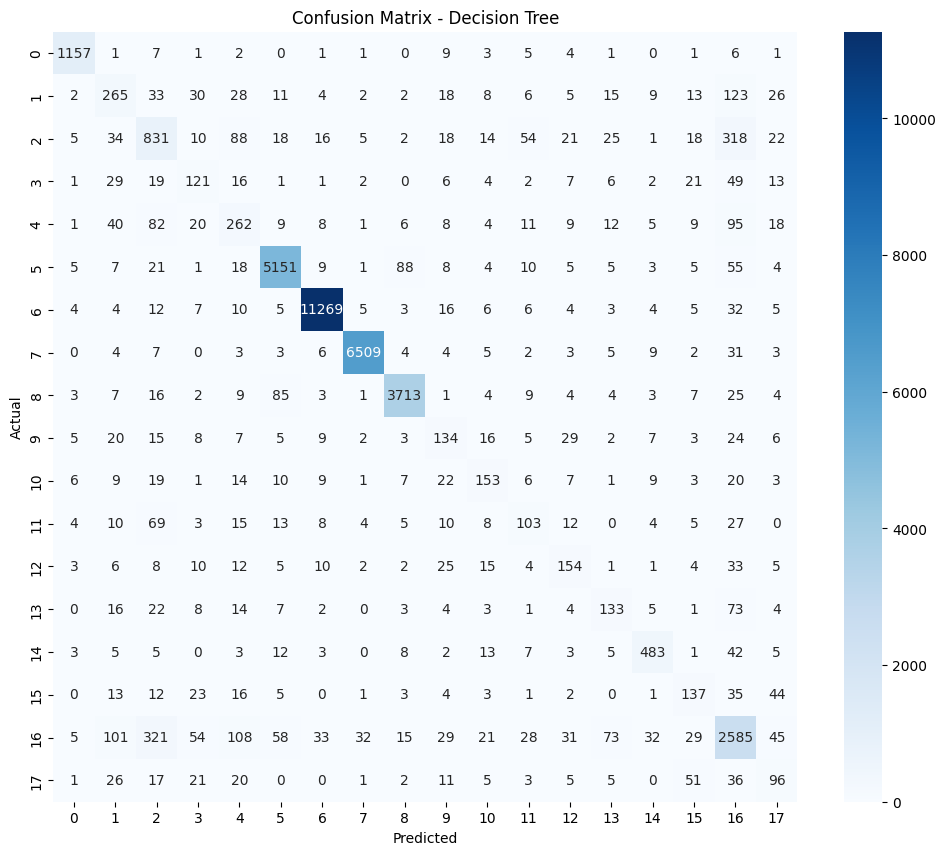


📌 MODEL: Random Forest
✔ Accuracy : 0.8922486772486773
✔ Precision: 0.8915964268928409
✔ Recall   : 0.8922486772486773
✔ F1 Score : 0.8910662334277213
✔ ROC-AUC  : 0.9678595423313765


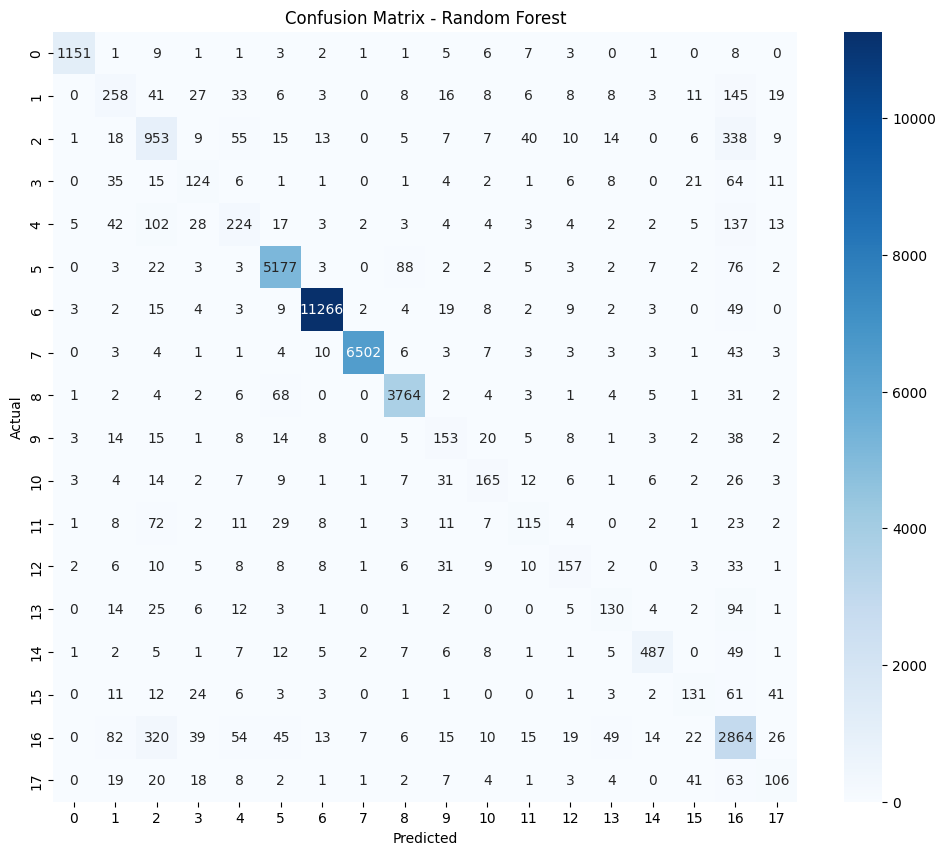


📌 MODEL: Gradient Boosting
✔ Accuracy : 0.8758994708994708
✔ Precision: 0.8821071412564964
✔ Recall   : 0.8758994708994708
✔ F1 Score : 0.8701771918366001
✔ ROC-AUC  : 0.9761190761953371


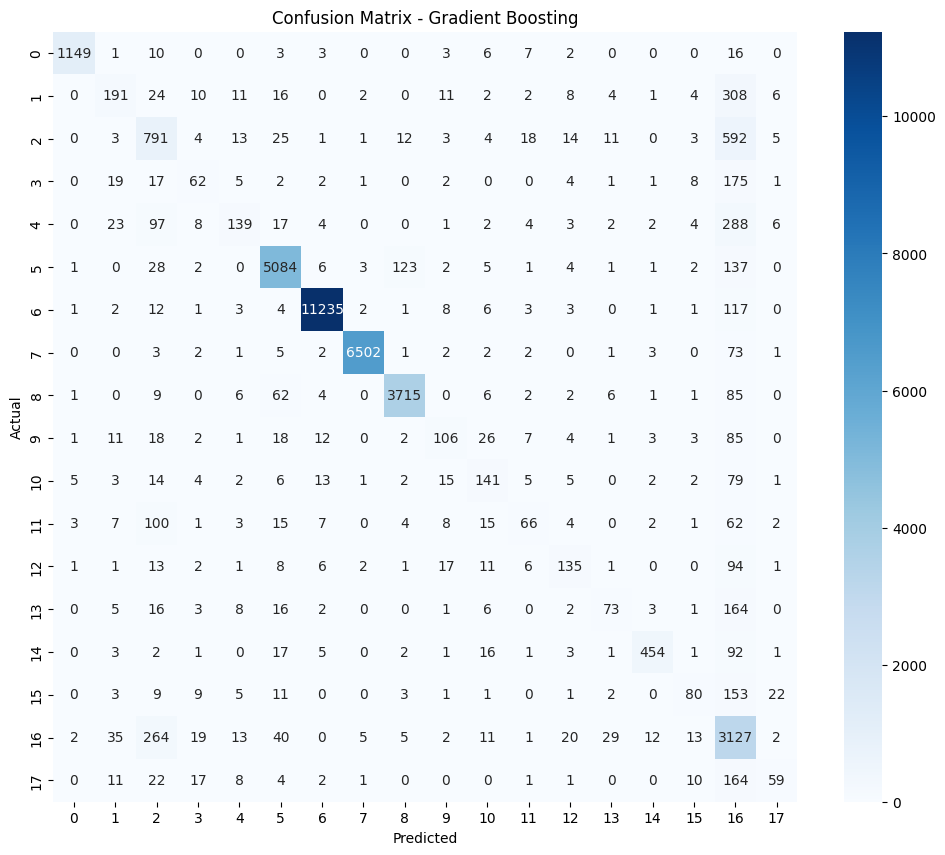


📌 MODEL: XGBoost
✔ Accuracy : 0.905952380952381
✔ Precision: 0.9063377059989195
✔ Recall   : 0.905952380952381
✔ F1 Score : 0.9047699026686422
✔ ROC-AUC  : 0.9888833533849728


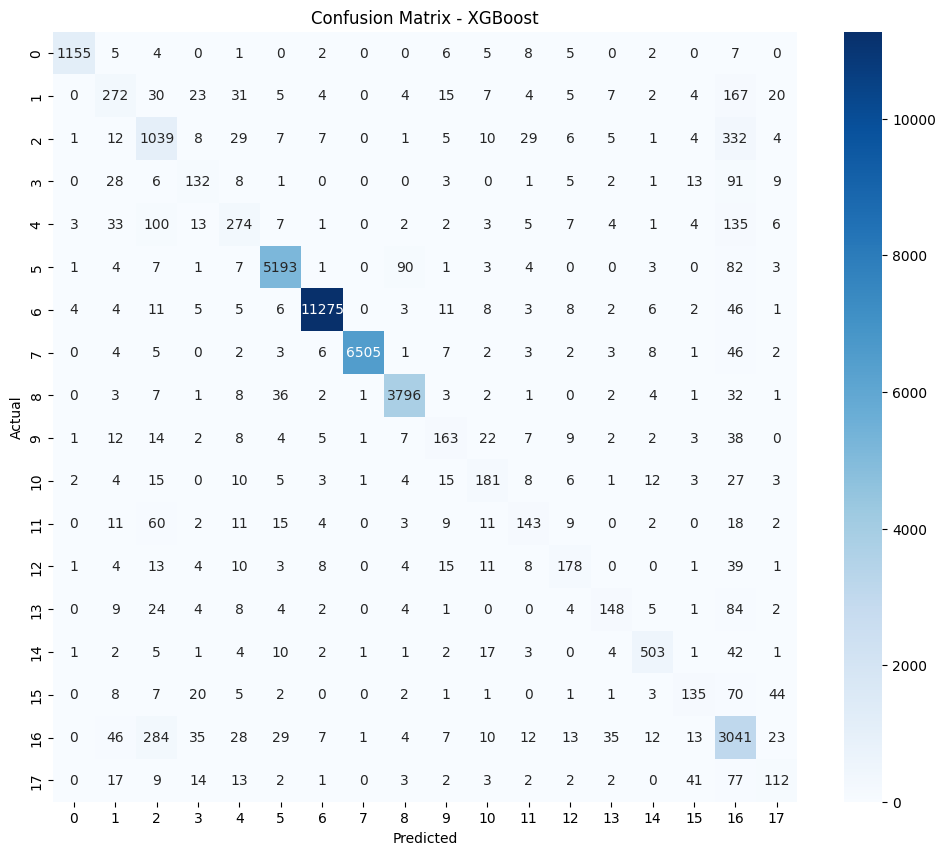


📌 MODEL: KNN
✔ Accuracy : 0.8536772486772487
✔ Precision: 0.8541944083493006
✔ Recall   : 0.8536772486772487
✔ F1 Score : 0.8525996788035513
✔ ROC-AUC  : 0.8613689428727602


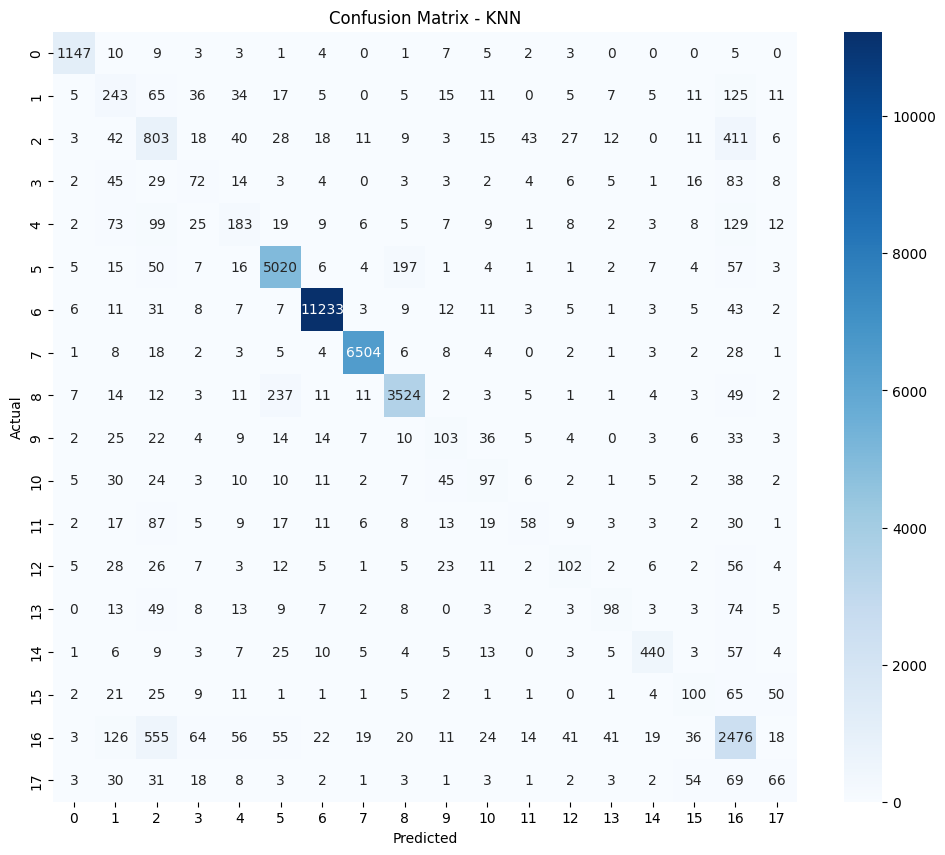


📌 MODEL: CatBoost
✔ Accuracy : 0.8889417989417989
✔ Precision: 0.8907874696899887
✔ Recall   : 0.8889417989417989
✔ F1 Score : 0.8851619606854787
✔ ROC-AUC  : 0.9845613046020539


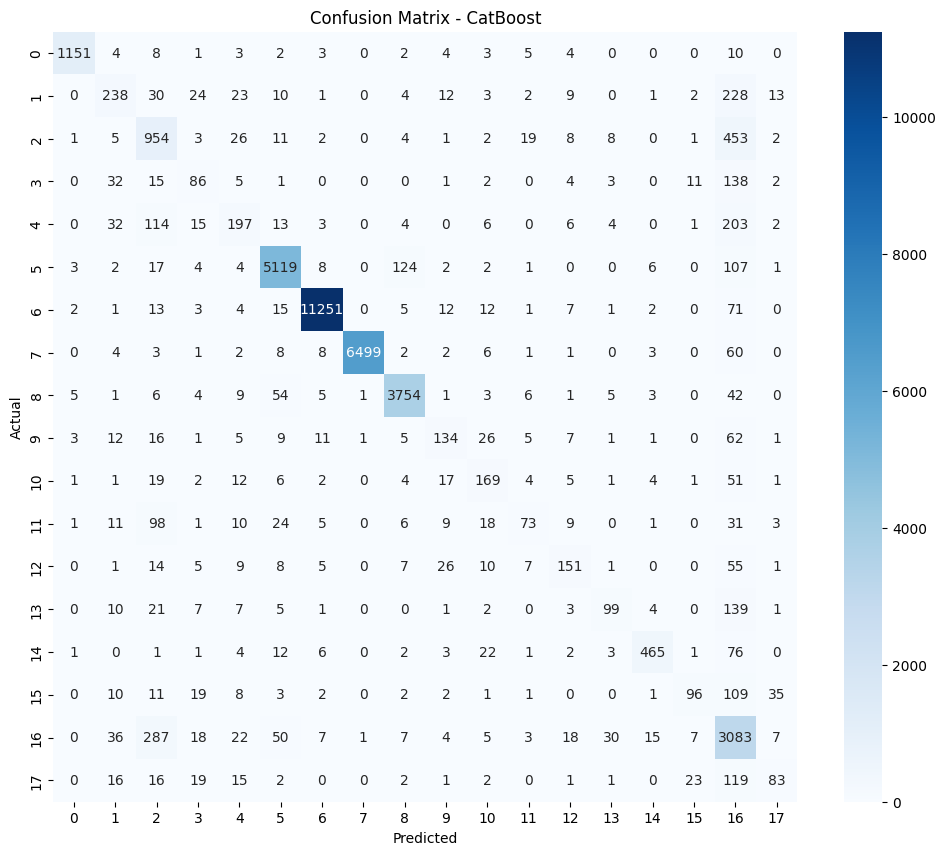

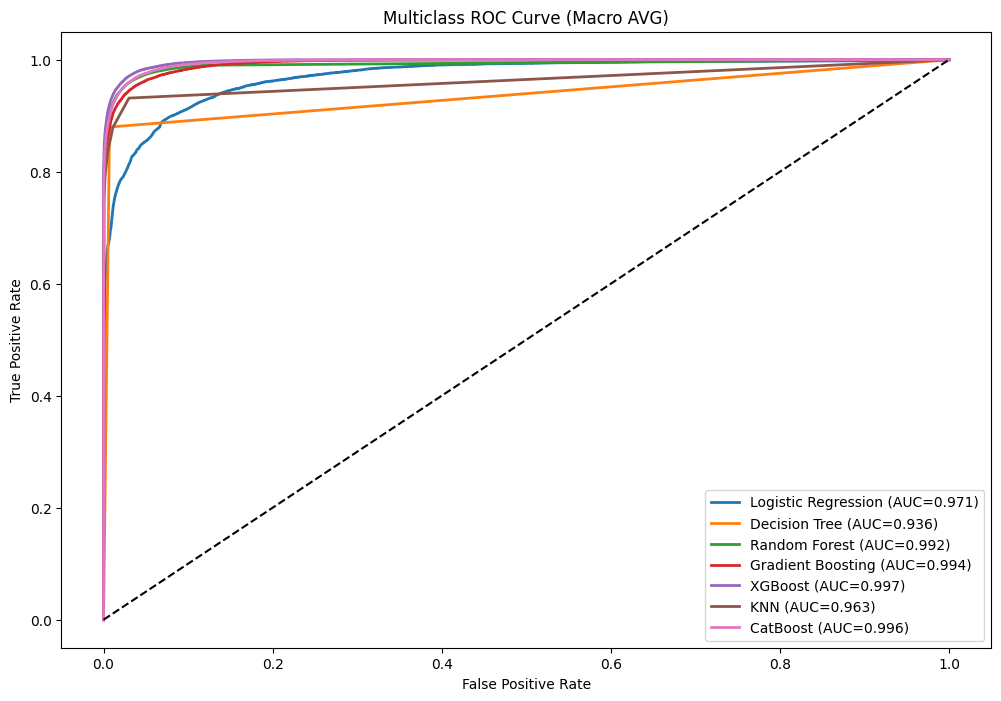

In [ ]:
# ================================================
# 1. IMPORT LIBRARIES
# ================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt

# ================================================
# 2. SELECT PCA FEATURES (already computed)
# ================================================
selected_features = list(pca_selected.index)       # Top PCA features
X = df_final[selected_features]
y = df_final["label"]

# Encode labels to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ================================================
# 3. TRAIN-TEST SPLIT
# ================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# ================================================
# 4. SCALING (for KNN + LR)
# ================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ================================================
# 5. DEFINE MODELS (SVM removed)
# ================================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "CatBoost": CatBoostClassifier(verbose=0, iterations=200)
}

# ================================================
# 6. MODEL EVALUATION FUNCTION
# ================================================
def evaluate_model(name, model, X_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\n====================================================")
    print(f"📌 MODEL: {name}")
    print("====================================================")
    print("✔ Accuracy :", accuracy_score(y_test, y_pred))
    print("✔ Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("✔ Recall   :", recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print("✔ F1 Score :", f1_score(y_test, y_pred, average='weighted', zero_division=0))

    # ROC-AUC (macro for multiclass)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        roc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')
        print("✔ ROC-AUC  :", roc_score)
    else:
        print("✔ ROC-AUC  : Not Available")
        y_prob = None

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12,10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return y_prob

# ================================================
# 7. TRAIN MODELS + STORE PROBABILITIES
# ================================================
probs = {}
for name, model in models.items():

    if name in ["KNN", "Logistic Regression"]:   # these need scaling
        probs[name] = evaluate_model(name, model, X_train_scaled, X_test_scaled)
    else:
        probs[name] = evaluate_model(name, model, X_train, X_test)

# ================================================
# 8. PLOT MULTICLASS ROC CURVE (MACRO)
# ================================================
plt.figure(figsize=(12,8))

for name, y_prob in probs.items():
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(),
                                y_prob.ravel())
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})", linewidth=2)

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (Macro AVG)")
plt.legend()
plt.show()


In [ ]:
pip install joblib


In [ ]:
import joblib

# Folder to save models
import os
os.makedirs("saved_models", exist_ok=True)

# Save all models
joblib.dump(models["Logistic Regression"], "saved_models/logistic_regression.pkl")
joblib.dump(models["Decision Tree"], "saved_models/decision_tree.pkl")
joblib.dump(models["Random Forest"], "saved_models/random_forest.pkl")
joblib.dump(models["Gradient Boosting"], "saved_models/gradient_boosting.pkl")
joblib.dump(models["XGBoost"], "saved_models/xgboost.pkl")
joblib.dump(models["KNN"], "saved_models/knn.pkl")
joblib.dump(models["CatBoost"], "saved_models/catboost.pkl")

print("✅ All models saved successfully!")


✅ All models saved successfully!


In [ ]:
from google.colab import files
!zip -r saved_models.zip saved_models
files.download("saved_models.zip")


updating: saved_models/ (stored 0%)
updating: saved_models/logistic_regression.pkl (deflated 7%)
updating: saved_models/catboost.pkl (deflated 43%)
updating: saved_models/gradient_boosting.pkl (deflated 70%)
updating: saved_models/random_forest.pkl (deflated 90%)
updating: saved_models/decision_tree.pkl (deflated 91%)
updating: saved_models/xgboost.pkl (deflated 66%)
updating: saved_models/knn.pkl (deflated 56%)
  adding: saved_models/scaler.pkl (deflated 28%)
  adding: saved_models/selected_features.pkl (deflated 57%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
joblib.dump(scaler, "saved_models/scaler.pkl")


['saved_models/scaler.pkl']

In [ ]:
joblib.dump(selected_features, "saved_models/selected_features.pkl")


['saved_models/selected_features.pkl']

In [ ]:
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), lr_proba.ravel())
auc_score = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label=f"Micro-average ROC (AUC={auc_score:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()


In [ ]:
# ================================================
# 1. IMPORT LIBRARIES
# ================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# ================================================
# 2. SELECT PCA FEATURES (already computed)
# ================================================
selected_features = list(pca_selected.index)   # Top 40 PCA features
X = df_final[selected_features]
y = df_final["label"]

# Encode string labels to numbers automatically
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ================================================
# 3. TRAIN-TEST SPLIT
# ================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# ================================================
# 4. SCALE DATA (important for KNN, MLP)
# ================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ================================================
# 5. DEFINE REMAINING 5 MODELS
# ================================================
models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    # "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    # "Cat Boosting": CatBoostClassifier(verbose=0, n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    # "Naive Bayes": GaussianNB(),
    # "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=800, random_state=42)
}

# ================================================
# 6. FUNCTION TO EVALUATE MODEL
# ================================================
def evaluate_model(name, model, X_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\n====================================================")
    print(f"📌 MODEL: {name}")
    print("====================================================")
    print("✔ Accuracy :", accuracy_score(y_test, y_pred))
    print("✔ Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("✔ Recall   :", recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print("✔ F1 Score :", f1_score(y_test, y_pred, average='weighted', zero_division=0))

    # Safe ROC-AUC calculation
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        if y_prob.ndim == 2 and y_prob.shape[1] > 1:
            print("✔ ROC-AUC  :", roc_auc_score(y_test, y_prob, multi_class='ovr'))
        else:
            print("✔ ROC-AUC  : Not Available")
    else:
        print("✔ ROC-AUC  : Not Available")

    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12,10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ================================================
# 7. TRAIN ALL 5 MODELS
# ================================================
for name, model in models.items():
    if name in ["KNN", "MLP Neural Network"]:
        evaluate_model(name, model, X_train_scaled, X_test_scaled)
    else:
        evaluate_model(name, model, X_train, X_test)



NameError: name 'pca_selected' is not defined

🔹 Training Random Forest models...


RF Training: 100%|██████████| 10/10 [49:17<00:00, 295.80s/it]



🔹 Training XGBoost models...


XGB Training: 100%|██████████| 10/10 [45:37<00:00, 273.80s/it]


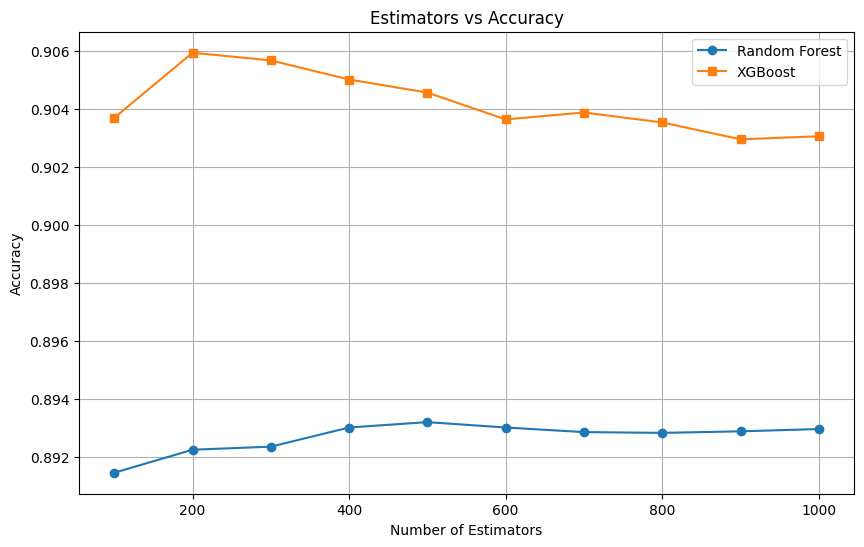

In [ ]:
# ================================================
# 1️⃣ IMPORT LIBRARIES
# ================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# ================================================
# 2️⃣ DATA PREPARATION
# ================================================
selected_features = list(pca_selected.index)
X = df_final[selected_features]
y = df_final["label"]

# Convert labels to integers for XGBoost
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ================================================
# 3️⃣ ESTIMATOR RANGE
# ================================================
estimators = range(100, 1001, 100)

rf_scores = []
xgb_scores = []

# ================================================
# 4️⃣ RANDOM FOREST TRAINING
# ================================================
print("🔹 Training Random Forest models...")
for n in tqdm(estimators, desc="RF Training"):
    rf = RandomForestClassifier(
        n_estimators=n,
        n_jobs=-1,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_scores.append(accuracy_score(y_test, y_pred))

# ================================================
# 5️⃣ XGBOOST TRAINING
# ================================================
print("\n🔹 Training XGBoost models...")
for n in tqdm(estimators, desc="XGB Training"):
    xgb = XGBClassifier(
        n_estimators=n,
        n_jobs=-1,
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    )
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    xgb_scores.append(accuracy_score(y_test, y_pred))

# ================================================
# 6️⃣ PLOT
# ================================================
plt.figure(figsize=(10,6))
plt.plot(estimators, rf_scores, marker='o', label="Random Forest")
plt.plot(estimators, xgb_scores, marker='s', label="XGBoost")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Estimators vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from xgboost import XGBClassifier

plt.figure(figsize=(12,8))

for n in range(100, 1100, 100):
    xgb = XGBClassifier(
        n_estimators=n,
        eval_metric="logloss",
        use_label_encoder=False
    )
    xgb.fit(X_train, y_train)
    xgb_proba = xgb.predict_proba(X_test)[:,1]

    fpr, tpr, _ = roc_curve(y_test, xgb_proba)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"XGBoost ({n} estimators) AUC={auc_score:.3f}")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves — XGBoost (100 → 1000 Estimators)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


ValueError: multiclass format is not supported

<Figure size 1200x800 with 0 Axes>

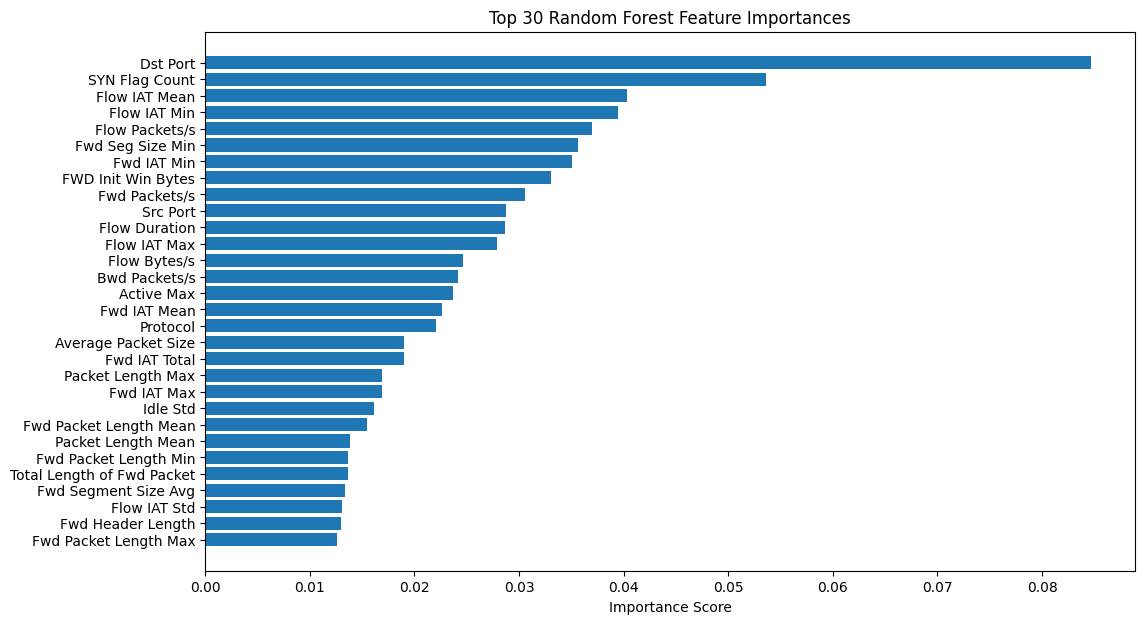

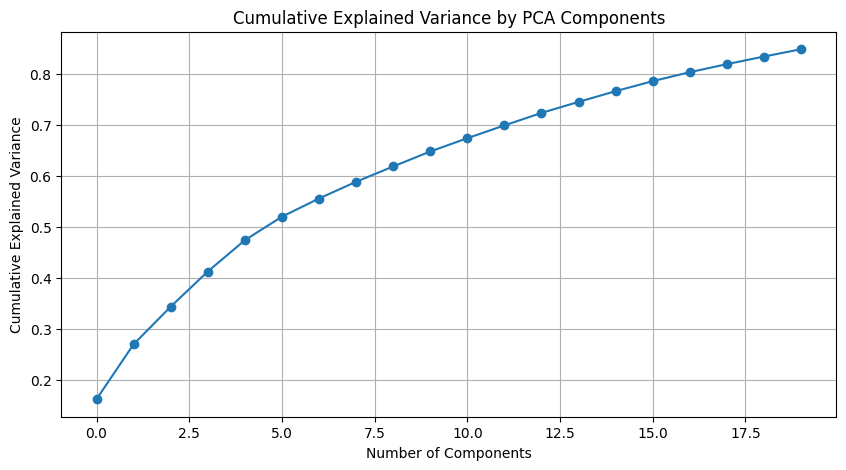

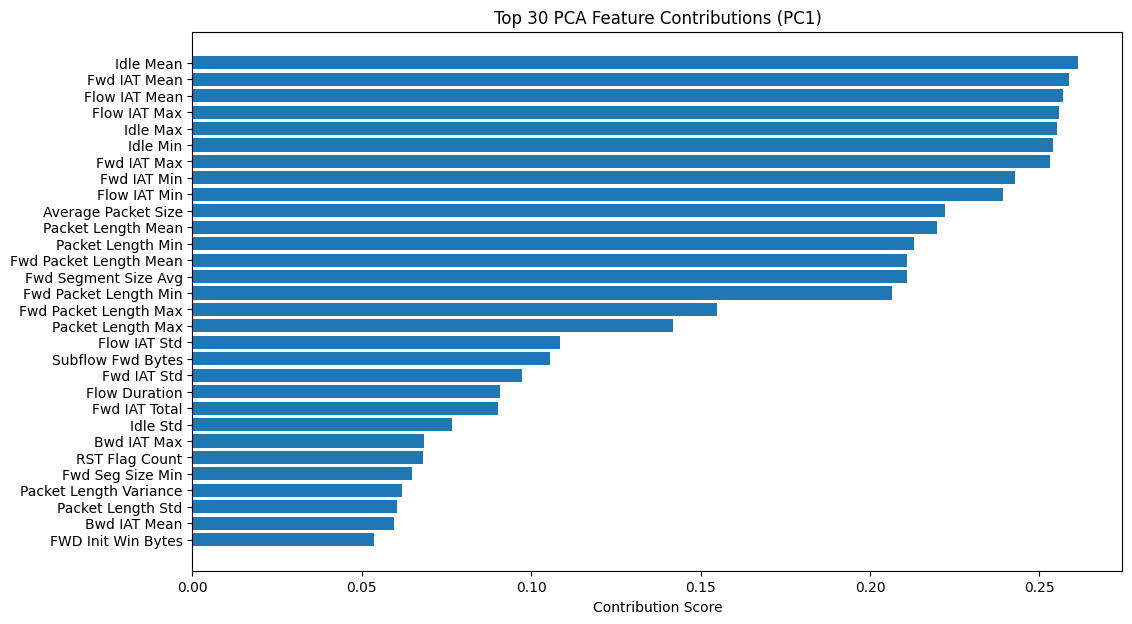

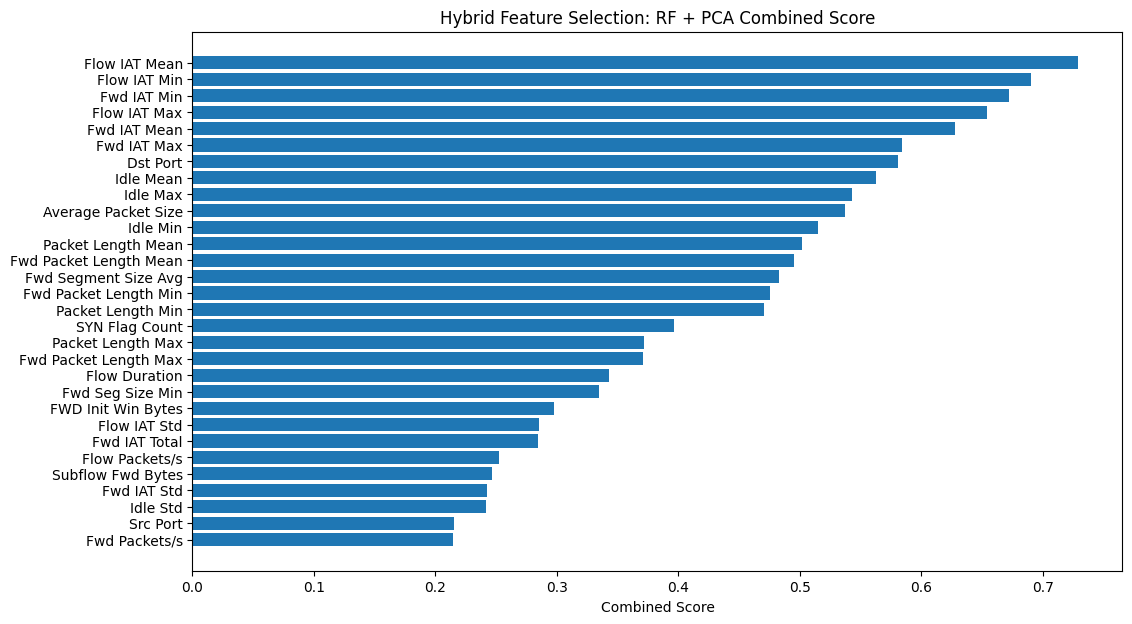

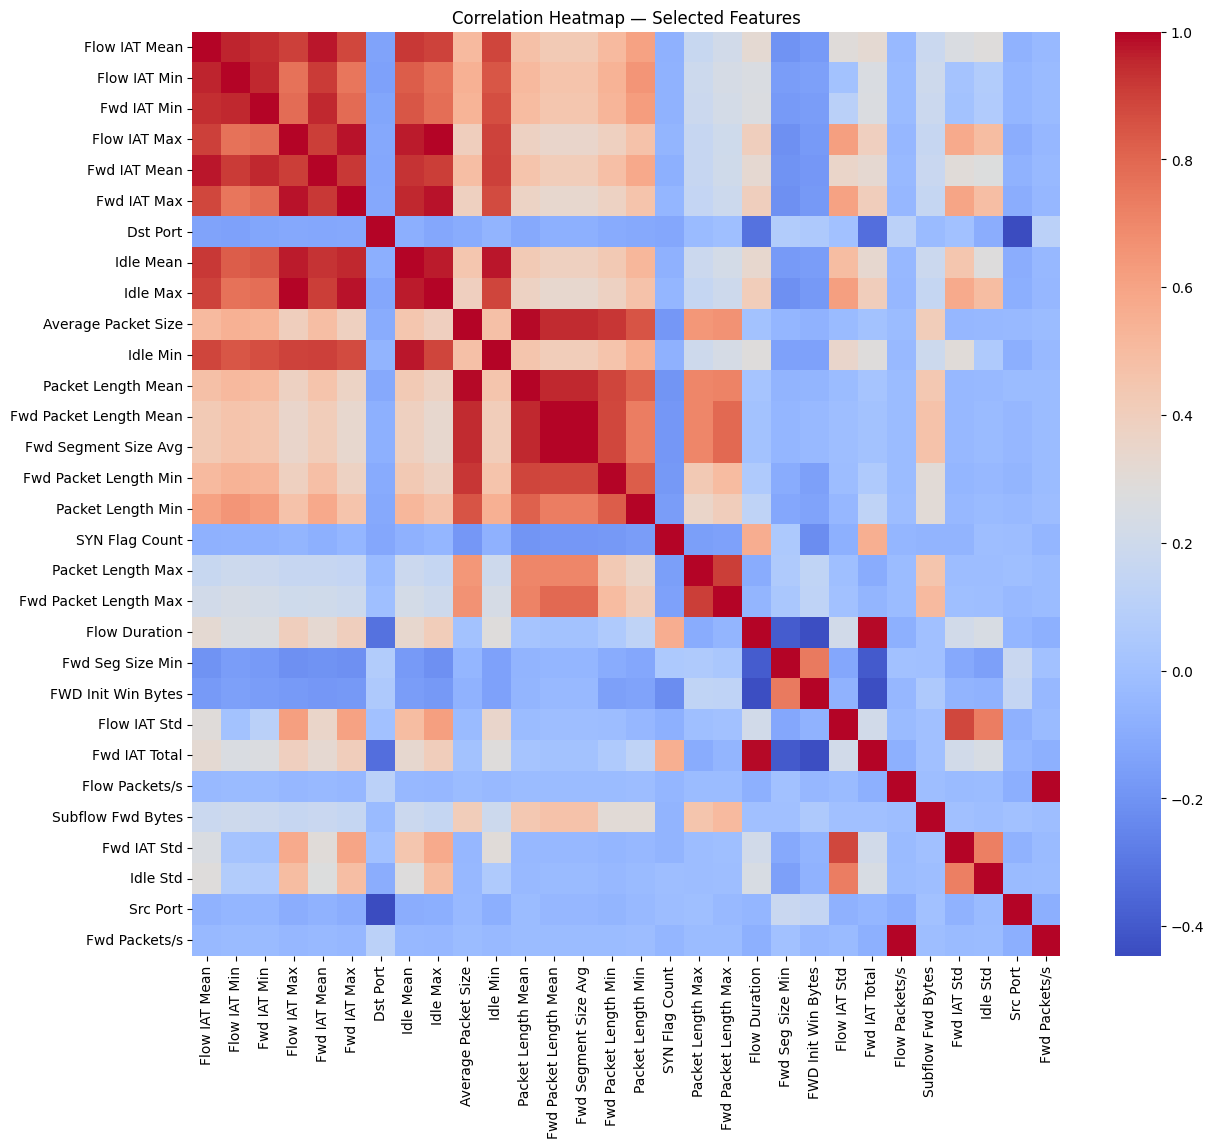

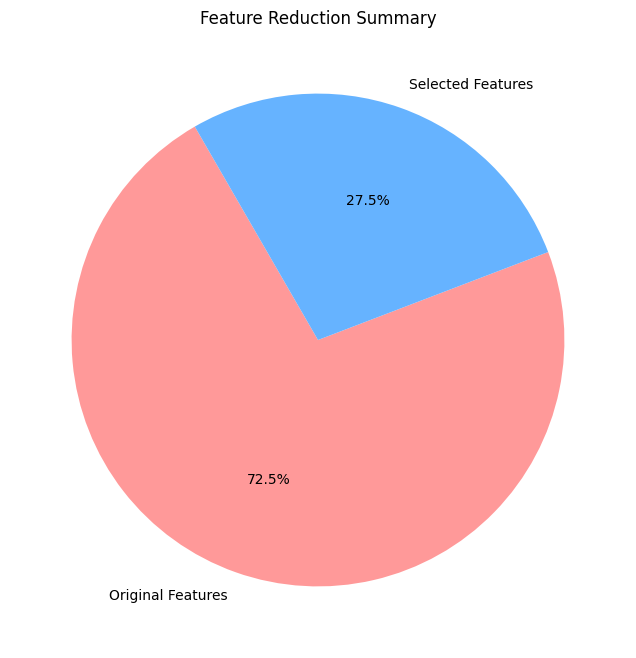

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------
# 1️⃣ CLEAN DATA (Mandatory for your dataset)
# ----------------------------------------------------------
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)

# Scaling for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------------------------------------
# 2️⃣ RANDOM FOREST FEATURE IMPORTANCE
# ----------------------------------------------------------
rf = RandomForestClassifier(n_estimators=120, random_state=42)
rf.fit(X, y)

rf_importance = rf.feature_importances_
rf_sorted_idx = np.argsort(rf_importance)[::-1]
top_rf_idx = rf_sorted_idx[:30]

# Plot – RF Feature Importance
plt.figure(figsize=(12,7))
plt.barh(X.columns[top_rf_idx], rf_importance[top_rf_idx])
plt.title("Top 30 Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

# ----------------------------------------------------------
# 3️⃣ PCA ANALYSIS
# ----------------------------------------------------------
pca = PCA(n_components=20)   # 20 is safe & fast
pca.fit(X_scaled)

# PCA explained variance plot
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# PCA feature contribution (1st component)
pca_importance = np.abs(pca.components_[0])
pca_sorted_idx = np.argsort(pca_importance)[::-1]
top_pca_idx = pca_sorted_idx[:30]

plt.figure(figsize=(12,7))
plt.barh(X.columns[top_pca_idx], pca_importance[top_pca_idx])
plt.title("Top 30 PCA Feature Contributions (PC1)")
plt.xlabel("Contribution Score")
plt.gca().invert_yaxis()
plt.show()

# ----------------------------------------------------------
# 4️⃣ HYBRID FEATURE SELECTION (RF + PCA)
# ----------------------------------------------------------
rf_norm = rf_importance / rf_importance.max()
pca_norm = pca_importance / pca_importance.max()

combined_score = (rf_norm + pca_norm) / 2

combined_df = pd.DataFrame({
    "Feature": X.columns,
    "Score": combined_score
}).sort_values(by="Score", ascending=False)

top_features = combined_df.head(30)

# Plot – Hybrid Feature Ranking
plt.figure(figsize=(12,7))
plt.barh(top_features["Feature"], top_features["Score"])
plt.title("Hybrid Feature Selection: RF + PCA Combined Score")
plt.xlabel("Combined Score")
plt.gca().invert_yaxis()
plt.show()

# ----------------------------------------------------------
# 5️⃣ CORRELATION HEATMAP
# Warning: Heatmap is heavy → use only 30 selected features
# ----------------------------------------------------------
selected_cols = top_features["Feature"].tolist()

plt.figure(figsize=(14,12))
sns.heatmap(X[selected_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap — Selected Features")
plt.show()

# ----------------------------------------------------------
# 6️⃣ PIE CHART (Feature Reduction Summary)
# ----------------------------------------------------------
plt.figure(figsize=(8,8))
plt.pie(
    [X.shape[1], len(top_features)],
    labels=["Original Features", "Selected Features"],
    autopct="%1.1f%%",
    startangle=120,
    colors=["#ff9999", "#66b3ff"]
)
plt.title("Feature Reduction Summary")
plt.show()


Numeric dataset shape: (75810, 80)


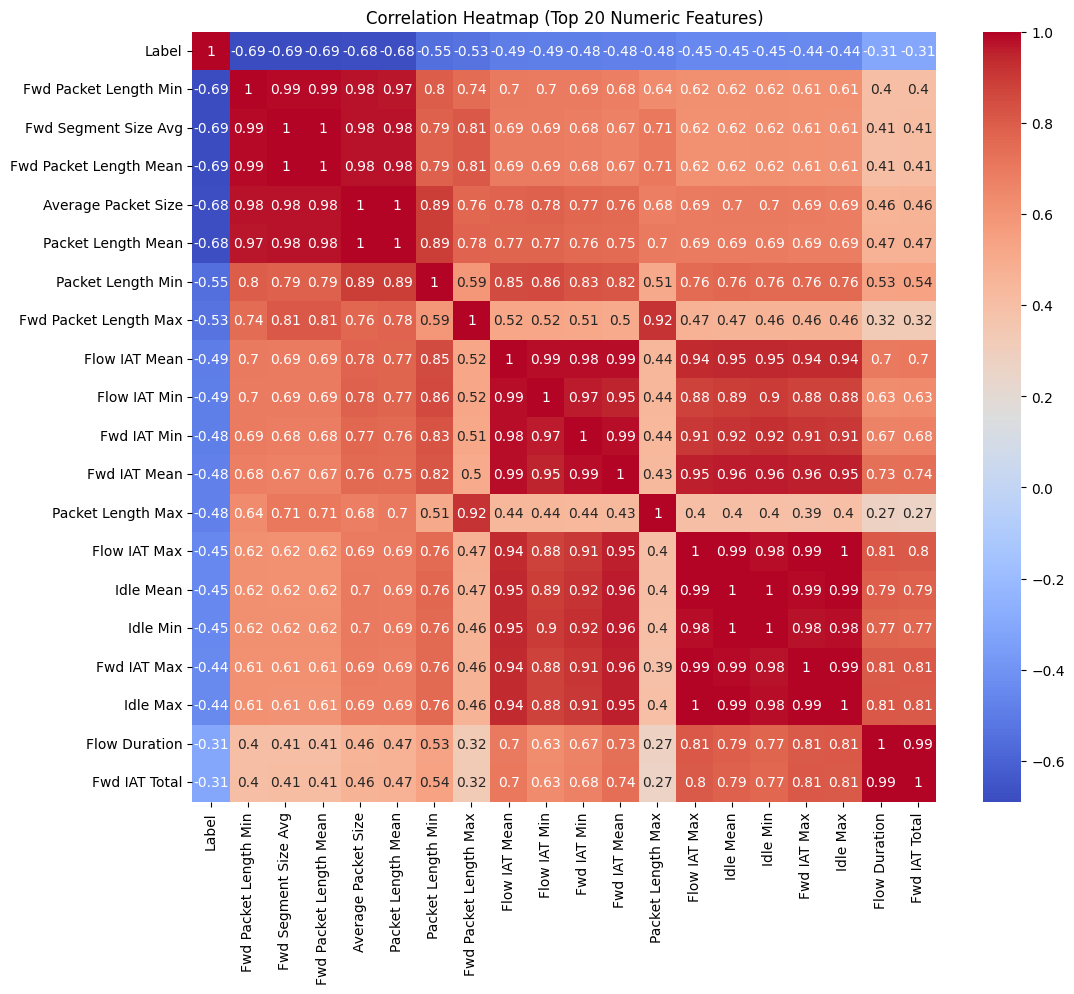

Features to drop due to high correlation: ['Fwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd Header Length', 'Fwd Packets/s', 'Packet Length Mean', 'ACK Flag Count', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Bwd Bytes/Bulk Avg', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Max', 'Idle Min']
Reduced numeric dataset shape: (75810, 60)


In [ ]:
# ------------------------------
# 1. Select only numeric columns
# ------------------------------
numeric_data = data.select_dtypes(include=[np.number])
print("Numeric dataset shape:", numeric_data.shape)

# ------------------------------
# 2. Compute correlation safely
# ------------------------------
corr_matrix = numeric_data.corr()

# ------------------------------
# 3. RAM-friendly heatmap (top 20 features correlated with Label)
# ------------------------------
top_features = corr_matrix['Label'].abs().sort_values(ascending=False).index[:20]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Top 20 Numeric Features)")
plt.show()

# ------------------------------
# 4. Drop highly correlated features if needed
# ------------------------------
threshold = 0.95
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
print("Features to drop due to high correlation:", to_drop)

data_reduced = numeric_data.drop(columns=to_drop)
print("Reduced numeric dataset shape:", data_reduced.shape)

# Ready for RF / PCA
X = data_reduced.drop('Label', axis=1)
y = data_reduced['Label']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import joblib
import json
import pandas as pd
import os

# ============================================
# 1️⃣ SET SAVE DIRECTORY (same as before)
# ============================================
SAVE_DIR = "/content/drive/MyDrive/IDS_Models"

# ============================================
# 2️⃣ LOAD SCALER
# ============================================
scaler = joblib.load(f"{SAVE_DIR}/scaler_model.joblib")
print("✔ Scaler loaded")

# ============================================
# 3️⃣ LOAD SELECTED FEATURES
# ============================================
with open(f"{SAVE_DIR}/selected_features.json", "r") as f:
    selected_features = json.load(f)
print("✔ Selected features loaded")
print(selected_features)

# ============================================
# 4️⃣ LOAD TRAINED MODELS
# ============================================
loaded_models = {}

for file in os.listdir(SAVE_DIR):
    if file.endswith(".joblib") and file != "scaler.joblib":
        model_name = file.replace(".joblib", "")
        loaded_models[model_name] = joblib.load(f"{SAVE_DIR}/{file}")
        print(f"✔ Loaded model: {model_name}")

# ============================================
# 5️⃣ LOAD PROCESSED DATASET (optional)
# ============================================
dataset_path = f"{SAVE_DIR}/processed_dataset.csv"
if os.path.exists(dataset_path):
    df_loaded = pd.read_csv(dataset_path)
    print("✔ Processed dataset loaded")
else:
    print("⚠ Dataset file not found!")

# ============================================
# 6️⃣ READY TO USE MODELS
# ============================================
print("\nAVAILABLE MODELS:")
for name in loaded_models.keys():
    print("➡", name)


✔ Scaler loaded
✔ Selected features loaded
['Bwd IAT Total', 'Fwd IAT Total', 'Flow Duration', 'Fwd IAT Min', 'Flow IAT Min', 'Idle Max', 'Fwd IAT Max', 'Flow IAT Max', 'Idle Min', 'Flow IAT Mean', 'Fwd IAT Mean', 'Fwd IAT Std', 'Flow IAT Std', 'Idle Mean', 'Bwd IAT Max', 'Active Max', 'Idle Std', 'Bwd IAT Mean', 'Bwd IAT Min', 'Active Mean', 'Active Std', 'Bwd IAT Std', 'Active Min', 'Flow Bytes/s', 'Packet Length Variance', 'Bwd Bulk Rate Avg', 'FWD Init Win Bytes', 'Flow Packets/s', 'Fwd Packets/s', 'Dst Port', 'Bwd Bytes/Bulk Avg', 'Src Port', 'Total Length of Fwd Packet', 'Bwd Init Win Bytes', 'Total Length of Bwd Packet', 'Total Fwd Packet', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Average Packet Size', 'Subflow Bwd Bytes']
✔ Loaded model: RandomForestClassifier
✔ Loaded model: LogisticRegression
✔ Loaded model: DecisionTreeClassifier
✔ Loaded model: XGBClassifier
✔ Loaded model: SVC
✔ Loaded model: model
✔ Loaded model: lr
✔ Loaded model: GradientBoostingClassifier
✔ Loaded 

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.5 MB/s eta 0:00:00


In [ ]:
def align_features(df, selected_features):
    # Add missing cols
    for col in selected_features:
        if col not in df.columns:
            df[col] = 0

    # Remove extra cols
    df = df[selected_features]

    return df


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# -----------------------------
# 1️⃣ Load test data
# -----------------------------
new_data = pd.read_csv("/content/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")

# -----------------------------
# 2️⃣ Preserve true labels
# -----------------------------
label_col = ' Label'  # Adjust if needed
y_true = new_data[label_col].copy()

# -----------------------------
# 3️⃣ Align features
# -----------------------------
aligned = align_features(new_data, selected_features)

# Drop label column if present
if label_col in aligned.columns:
    aligned = aligned.drop(columns=[label_col])

# Replace inf/-inf with NaN and fill
aligned = aligned.replace([np.inf, -np.inf], np.nan)
aligned = aligned.fillna(0)

# -----------------------------
# 4️⃣ Scale features
# -----------------------------
scaled = scaler.transform(aligned)

# -----------------------------
# 5️⃣ Make numeric predictions
# -----------------------------
y_pred_numeric = models["Random Forest"].predict(scaled)

# -----------------------------
# 6️⃣ Map numeric predictions to string labels
# -----------------------------
# Full mapping from training (adjust as per your model)
full_mapping = {
    5: "BENIGN",
    6: "PortScan",
    7: "DDoS",
    8: "DoS Hulk",
    # 4: "DoS GoldenEye",
    # 5: "DoS Slowloris"
}

# Convert predictions, ignore numbers not in mapping
y_pred_str = [full_mapping.get(p, "Unknown") for p in y_pred_numeric]

# -----------------------------
# 7️⃣ Filter mapping to only classes in test set
# -----------------------------
classes_in_test = np.unique(y_true)
# This ensures metrics are computed only for present classes
labels_for_report = [cls for cls in classes_in_test if cls in full_mapping.values()]

# -----------------------------
# 8️⃣ Evaluate predictions
# -----------------------------
print("Accuracy:", accuracy_score(y_true, y_pred_str))
print("Precision:", precision_score(y_true, y_pred_str, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_true, y_pred_str, average='weighted', zero_division=0))
print("F1 Score :", f1_score(y_true, y_pred_str, average='weighted', zero_division=0))

print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred_str, labels=labels_for_report))
print("\nClassification Report:\n", classification_report(y_true, y_pred_str, labels=labels_for_report, zero_division=0))

# -----------------------------
# 9️⃣ Save predictions
# -----------------------------
new_data['Predicted'] = y_pred_str
new_data.to_csv("predictions_with_labels.csv", index=False)
print("\nPredictions saved to 'predictions_with_labels.csv'")


Accuracy: 0.5548667036691836
Precision: 0.7533249905539404
Recall   : 0.5548667036691836
F1 Score : 0.3963447870931112

Confusion Matrix:
 [[    21 127237]
 [     0 158930]]

Classification Report:
               precision    recall  f1-score   support

      BENIGN       1.00      0.00      0.00    127537
    PortScan       0.56      1.00      0.71    158930

   micro avg       0.56      0.55      0.56    286467
   macro avg       0.78      0.50      0.36    286467
weighted avg       0.75      0.55      0.40    286467


Predictions saved to 'predictions_with_labels.csv'


In [ ]:
print(np.unique(y_pred_numeric))


[5 6 7 8]


In [ ]:
pred_rf = models["Random Forest"].predict(scaled)
print(pred_rf)


[6 6 6 ... 6 6 6]


In [ ]:
print(new_data.columns)


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std',
       ...
       'Dst Port', 'Bwd Bytes/Bulk Avg', 'Src Port',
       'Total Length of Fwd Packet', 'Bwd Init Win Bytes',
       'Total Length of Bwd Packet', 'Total Fwd Packet', 'Subflow Fwd Bytes',
       'Average Packet Size', 'Subflow Bwd Bytes'],
      dtype='object', length=112)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test):
    # Get predictions
    y_pred = model.predict(X_test)

    print("\n======", model.__class__.__name__, "======")

    # Accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Precision, Recall, F1-score (macro handles multi-class)
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1-score:", f1_score(y_test, y_pred, average='macro'))

    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train_scaled and y_train are your training data
# Use class_weight='balanced' to handle imbalance automatically
rf_balanced = RandomForestClassifier(
    n_estimators=500,      # adjust as needed
    max_depth=None,        # can tune
    random_state=42,
    class_weight='balanced',  # critical for imbalanced classes
    n_jobs=-1
)

rf_balanced.fit(X_train_scaled, y_train)  # train model
